# Machine Learning (CS535): Assignment 2
## Linear and Logistic Regression
#### Name: Abdul Rafay
#### Roll Number: 24100173

### Instructions


*   The aim of this assignment is to implement linear and logistic regression from scratch.
*   You must use the Python programming language.
*   You can add as many code/markdown cells as required.
*   ALL cells must be run (and outputs visible) in order to get credit for your work.
*   Please use procedural programming style and comment your code thoroughly.
*   There are two parts of this assignment. In part 1, you can use **NumPy**, **Pandas**, **Matplotlib**, **Seaborn**, and any other standard Python libraries. You are $\color{red}{\text{not allowed}}$ to use **scikit-learn**, or any other machine learning toolkit. You can only use **scikit-learn** in part 2.
*   **Carefully read the submission instructions and plagiarism policy.**
*   Deadline to submit this assignment is 7th November 2022, 11:55pm on LMS.

### Submission Instructions

You should submit both your notebook file (.ipynb) and python script (.py) on LMS.
Please name your files Name_RollNo_Assignment2. Zip these files in a folder and name
the folder Name_RollNo_Assignment2. If you don't know how to save .ipynb as .py see
[this](https://i.stack.imgur.com/L1rQH.png). Failing to submit any one of them might result in the reduction of marks.

### Plagiarism Policy

The code $\color{red}{\text{MUST}}$ be done independently. Any plagiarism or cheating of work from others
or the internet will be immediately referred to the DC. If you are confused about what
constitutes plagiarism, it is your responsibility to consult with the instructor or the TA
in a timely manner. **PLEASE DO NOT LOOK AT ANYONE ELSE'S CODE
NOR DISCUSS IT WITH THEM.**


### Introduction
In this assignment, you will be implementing linerar regression and logistic regression models for the provided datasets from scratch. A description of the problem statement is given at the start of each part. 

Try to write modeular code as some of the functions you write for task 1 may be usable in task 2.

Have fun!

## Task 1: Multivariate Linear Regression

In this part, you will implement multivariate linear regression (from scratch) to predict the the median price of homes in a Boston suburb during the mid-1970s. To do this, you are given with the dataset that has 404 examples in the train set and 102 examples in test set. Each example has 13 input variables (features) and one output variable (price in $10,000s). Below is the description of input variables:

- Per capita crime rate.
- The proportion of residential land zoned for lots over 25,000 square feet.
- The proportion of non-retail business acres per town.
- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- Nitric oxides concentration (parts per 10 million).
- The average number of rooms per dwelling.
- The proportion of owner-occupied units built before 1940.
- Weighted distances to five Boston employment centers.
- Index of accessibility to radial highways.
- Full-value property-tax rate per $10,000.
- Pupil-teacher ratio by town.
- 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
- Percentage lower status of the population.

Each one of these input features is stored using a different scale. Some features are represented by a proportion between 0 and 1, other features are ranges between 1 and 12, some are ranges between 0 and 100, and so on. This is often the case with real-world data, and understanding how to explore and clean such data is an important skill to develop.

A common way to normalize features that use different scales and ranges is:

- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations.

Note: We only use examples of the train set to estimate the mean and standard deviation.

You have to follow exactly the same steps as above i.e. implement hypothesis, cost function and gradient descent for multivariate linear regression to learn parameters $\theta$ using train set. Finally, report the cost (error) using your learned parameters $\theta$ on test set. Expected Mean Square Error on this dataset is 11.5 - 12.5 approximately. 

We provide you with the code needed to load this dataset. The dataset is loaded from the data files into the variables `train_X`, `train_Y`, `test_X` and `test_Y`.

### Part A: Implementation from scratch

Use the slides and textbook as a reference to write the gradient descent algorithm from scratch for this problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# inline matplotlib plots
%matplotlib inline

In [7]:
# load the dataset
print("Loading data...")

data_train_X = pd.read_csv('Dataset/Task1/trainData.txt', sep=" ", header=None)
data_train_y = pd.read_csv('Dataset/Task1/trainLabels.txt', sep=" ", header=None)
data_test_X = pd.read_csv('Dataset/Task1/testData.txt', sep=" ", header=None)
data_test_y = pd.read_csv('Dataset/Task1/testLabels.txt', sep=" ", header=None)

train_X = data_train_X.to_numpy().astype(np.float64)
train_y = data_train_y.to_numpy().astype(np.float64)
test_X = data_test_X.to_numpy().astype(np.float64)
test_y = data_test_y.to_numpy().astype(np.float64)

# print the shapes of the data
print("train_X shape: ", train_X.shape)
print("train_y shape: ", train_y.shape)
print("test_X shape: ", test_X.shape)
print("test_y shape: ", test_y.shape)

Loading data...
train_X shape:  (404, 13)
train_y shape:  (404, 1)
test_X shape:  (102, 13)
test_y shape:  (102, 1)


In [8]:
# adding names of the columns to the dataframe

data_train_X.columns = ['Crime rate', 'Residential land zone', 'Business acres', 'Charles River', 'Nitric oxide concentration', 'Number of rooms', 'Age of buildings', 'Distance to employment centres', 'Highway accessibility', 'Property tax rate', 'Pupil-teacher ratio', 'Black population', 'Lower status of population']
data_train_y.columns = ['Median value of owner-occupied homes']

data_test_X.columns = ['Crime rate', 'Residential land zone', 'Business acres', 'Charles River', 'Nitric oxide concentration', 'Number of rooms', 'Age of buildings', 'Distance to employment centres', 'Highway accessibility', 'Property tax rate', 'Pupil-teacher ratio', 'Black population', 'Lower status of population']
data_test_y.columns = ['Median value of owner-occupied homes']

In [9]:

# print the first 5 rows of the data
print("train_X data:")
print(data_train_X.head())

train_X data:
   Crime rate  Residential land zone  Business acres  Charles River  \
0     0.17134                    0.0           10.01            0.0   
1     0.28960                    0.0            9.69            0.0   
2     0.06588                    0.0            2.46            0.0   
3     0.08707                    0.0           12.83            0.0   
4     1.25179                    0.0            8.14            0.0   

   Nitric oxide concentration  Number of rooms  Age of buildings  \
0                       0.547            5.928              88.2   
1                       0.585            5.390              72.9   
2                       0.488            7.765              83.3   
3                       0.437            6.140              45.8   
4                       0.538            5.570              98.1   

   Distance to employment centres  Highway accessibility  Property tax rate  \
0                          2.4631                    6.0              4

In [10]:
# concatenate the train_X and train_y dataframes
data_train = pd.concat([data_train_X, data_train_y], axis=1)

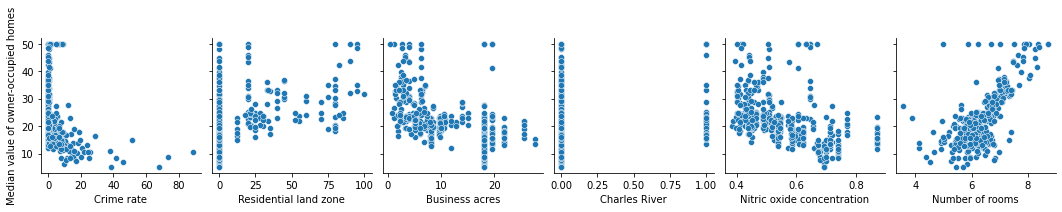

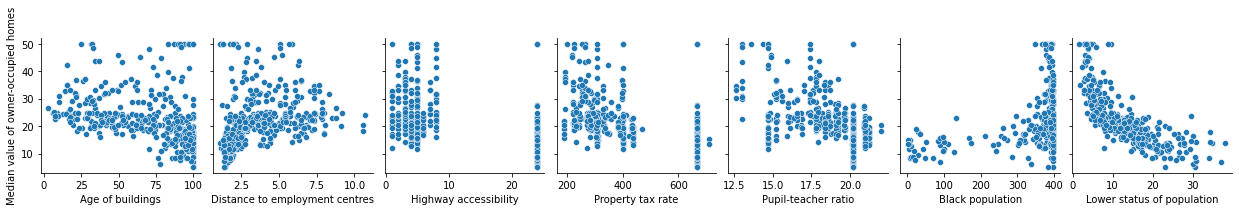

In [11]:
# Plot the data
sns.pairplot(data_train, x_vars=['Crime rate', 'Residential land zone', 'Business acres', 'Charles River', 'Nitric oxide concentration', 'Number of rooms'], y_vars='Median value of owner-occupied homes')
sns.pairplot(data_train, x_vars=['Age of buildings', 'Distance to employment centres', 'Highway accessibility', 'Property tax rate', 'Pupil-teacher ratio', 'Black population', 'Lower status of population'], y_vars='Median value of owner-occupied homes')

In [12]:
# Multivariate linear regression class. Bias is kept separate
class LinearRegression:
    def __init__(self, X, y, learning_rate=0.05, epochs=1000):
        
        self.X = X
        self.y = y

        self.m = X.shape[0]
        self.n = X.shape[1]

        self.learning_rate = learning_rate
        self.epochs = epochs

        self.weights = np.zeros((X.shape[1], 1))
        self.bias = np.zeros((1, 1))
        self.losses = []

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def calculateCost(self, y, y_pred):
        cost = np.mean((y - y_pred) ** 2) / 2
        return cost

    def R2score(self, y_pred, y):
        return 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)
    
    def get_weights(self):
        return self.weights
    
    def get_bias(self):
        return self.bias

    def fit(self):
        for i in range(1, self.epochs+1):
            if i % 1000 == 0:
                print("Epoch: ", i)
            
            y_pred = self.predict(self.X)
            cost = self.calculateCost(self.y, y_pred)
            self.losses.append(cost)
            dw = np.dot(self.X.T, (y_pred - self.y)) / self.m
            db = np.sum(y_pred - self.y) / self.m
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        # Print final loss
        print("Final cost: ", cost)

    def plot_loss(self):
        plt.plot(self.losses)
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.show()

In [13]:
# Normalize the training data
train_X = (train_X - np.mean(train_X, axis=0)) / np.std(train_X, axis=0)

# Normalize the test data
test_X = (test_X - np.mean(test_X, axis=0)) / np.std(test_X, axis=0)

In [14]:
# Run the linear regression model on data.
model = LinearRegression(train_X, train_y, learning_rate=0.003, epochs=5000)
model.fit()

# Print R2 score for training data
y_pred = model.predict(train_X)
print("R2 score for training data: ", model.R2score(y_pred, train_y))

Epoch:  1000
Epoch:  2000
Epoch:  3000
Epoch:  4000
Epoch:  5000
Final cost:  11.068222325490012
R2 score for training data:  0.738409398956433


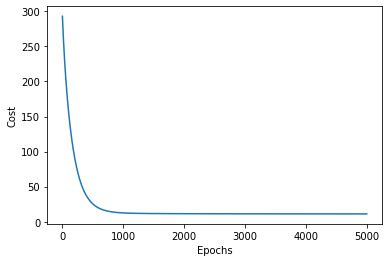

In [15]:
# Plot the loss curve
model.plot_loss()

In [16]:
# Running the model on test data
y_pred = model.predict(test_X)
loss = model.calculateCost(test_y, y_pred)

# Print the loss
print("Test loss: ", loss)

# Print the R2 score
print("R2 score: ", model.R2score(y_pred, test_y))

Test loss:  10.322631196951974
R2 score:  0.7519905343036448


### Part B: Regularized Linear Regression Using Scikit-learn


Now, you'll use the [scikit-learn](https://scikit-learn.org/stable/index.html) to implement [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) and apply them to Boston house pricing dataset (provided in part 2). Try out different values of regularization coefficient (known as alpha in scikit-learn) and use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to report loss with each regression. Finally, plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$ (y-axis) for Ridge and Lasso. Please read [this blog](https://scienceloft.com/technical/understanding-lasso-and-ridge-regression/) to get better understanding of the desired plots.

In [17]:
# Use scikit-learn to run the linear regression model on data.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
linear_reg = LinearRegression()

# Train the model using the training sets
linear_reg.fit(train_X, train_y)

# Mean squared error on training data
print("Mean squared error on training data: ", mean_squared_error(train_y, linear_reg.predict(train_X)))

# Make predictions using the testing set
y_pred = linear_reg.predict(test_X)

# The mean squared error on test data
print('Mean squared error on test data: ', mean_squared_error(test_y, y_pred))

Mean squared error on training data:  22.004800838348142
Mean squared error on test data:  20.982945190702573


In [18]:
# Compare scikit-learn's Ridge, Lasso and ElasticNet regression models using different values of alpha
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Create a list of alphas
alphas = np.logspace(-4, 4, 10000)

# Create a list of models
models = [Ridge(), Lasso(), ElasticNet()]
names  = ["Ridge", "Lasso", "ElasticNet"]

# Create a dicttionary with model name as key and list of MSEs as value
model_mse = {model: [] for model in names}

# Create a dictionary with model name as key and value as a dictionary with alpha as key and weights as value
model_weights = {model: {} for model in names}

# Print the Mean squared error and R2 score for each model
for model in models:
    # Print name of the model
    model_name = model.__class__.__name__
    print("Model: ", model_name)
    for alpha in alphas:
        model.set_params(alpha=alpha)
        model.fit(train_X, train_y)
        y_pred = model.predict(test_X)
        mse = mean_squared_error(test_y, y_pred)
        # print("Mean squared error for alpha = ", alpha, ": ", mse)
        model_mse[model_name].append(mse)
        
        # Store the weights for each alpha
        model_weights[model_name][alpha] = (model.coef_).reshape(13)

Model:  Ridge
Model:  Lasso
Model:  ElasticNet


Alpha with lowest MSE for  Ridge :  46.61941899071625


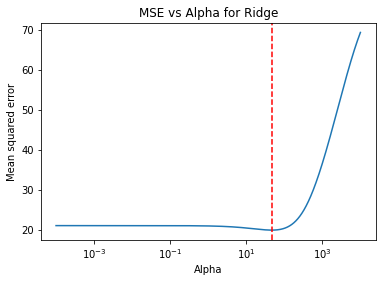

Alpha with lowest MSE for  Lasso :  0.28546019265289896


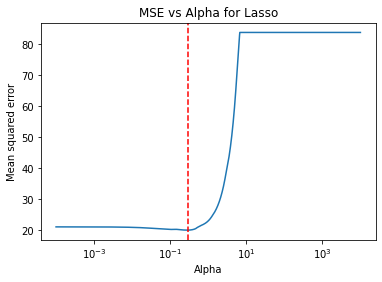

Alpha with lowest MSE for  ElasticNet :  0.14385196264942876


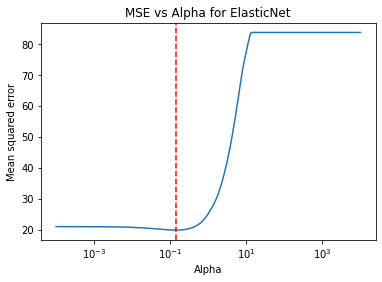

In [20]:
# Plot the MSE against alpha for each model. On the plot, the alpha value with the lowest MSE is marked, and printed.
for model in models:
    model_name = model.__class__.__name__
    plt.plot(alphas, model_mse[model_name], label=model_name)
    plt.xlabel('Alpha')
    plt.ylabel('Mean squared error')
    plt.xscale('log')
    plt.title(f'MSE vs Alpha for {model_name}')
    plt.axvline(x=alphas[np.argmin(model_mse[model_name])], color='red', linestyle='--')
    print("Alpha with lowest MSE for ", model_name, ": ", alphas[np.argmin(model_mse[model_name])])
    plt.show()

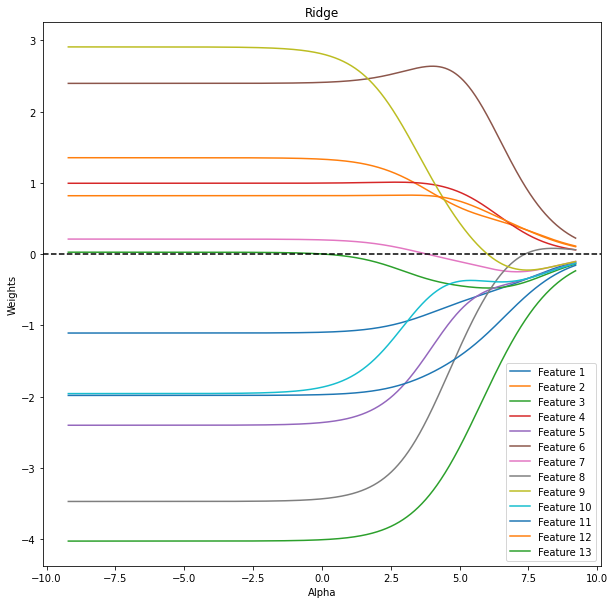

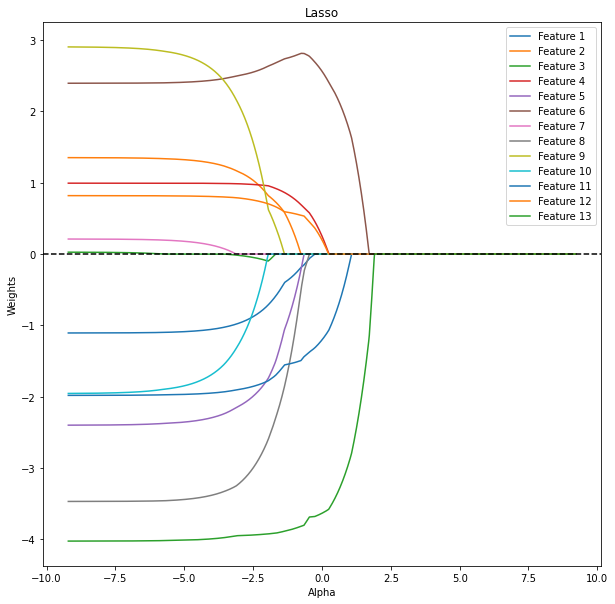

In [24]:
for model in names:
    # skip if model is ElasticNet
    if model == "ElasticNet":
        continue
    model_name = model
    for i in range(13):
        plt.plot(np.log(alphas), [model_weights[model_name][alpha][i] for alpha in model_weights[model_name].keys()], label="Feature " + str(i+1))
    # plot a dashed horizontal line at y=0
    plt.axhline(y=0, linestyle='--', color='black')
    plt.xlabel("Alpha")
    plt.ylabel("Weights")
    plt.title(model_name)
    plt.legend()
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.show()

## Task 2: Logistic Regression

#### Problem:
The purpose of this assignment is to get you familiar with sentiment classification. By the end of this assignment you will have your very own “Sentiment Analyzer”. You are given with Large Movie Review Dataset that contains separate labelled train and test set. Your task is to train a Logistic Regression classifier on train set and report accuracy on test set.

#### Dataset:
The core dataset contains 50,000 reviews split evenly into 25k train and 25k test sets. The overall distribution of labels is balanced (25k pos and 25k neg). There are two top-level directories [train/, test/] corresponding to the training and test sets. Each contains [pos/, neg/] directories for the reviews with binary labels positive and negative. Within these directories, reviews are stored in text files named following the convention [[id]_[rating].txt] where [id] is a unique id and [rating] is the star rating for that review on a 1-10 scale. For example, the file [test/pos/200_8.txt] is the text for a positive-labeled test set example with unique id 200 and star rating 8/10 from IMDb.

#### Preprocessing:
In the preprocessing step you’re required to remove the stop words and punctuation marks and other unwanted characters from the reviews and convert them to lower case. You may find the string and regex module useful for this purpose. A stop word list is provided with the assignment statement.

#### Feature Extraction:
In the feature extraction step you can you’ll represent each review by the 3 features 𝑥0, 𝑥1, 𝑥2 and 1 class label 𝑦 as shown in the table below:

| Feature | Definition | Comment |
| --- | --- | --- |
| x_0 | count(positive words) ∈ review | Positive lexicon is provided |
| --- | --- | --- |
| x_2 | count(negative words) ∈ review | Negative lexicon is provided |
| --- | --- | --- |
| y | 1 if positive, 0 otherwise | Mentioned in directory name |


### Part A: Implementation from scratch

#### Guidelines:
Implement the following in order to complete this part:
* Sigmoid function
* Cross-entropy loss function
* Batch Gradient Descent
* Prediction function that predict whether the label is 0 or 1 for test reviews using learned logistic regression (use the decision threshold of 0.5)
* Evaluation function that calculates classification accuracy and confusion matrix on test set (the expected accuracy on the test set is around 72%)
* Report plots with no. of iterations/ epochs on x-axis and training/ validation loss on y-axis.

In [25]:
# function to load data from a file into a list
def load_data(filename):
    data = []
    
    with open(filename, encoding = "ISO-8859-1") as f:
        for line in f:
            data.append(line.strip())
    return data

# function to convert a list of strings to a hashset for fast lookup
def convert_to_set(data):
    data_set = set()
    for item in data:
        data_set.add(item)
    return data_set

In [26]:
# load positive words
positive_words = load_data("Dataset/Task2/positive_words.txt")
positive_words_set = convert_to_set(positive_words)

# load negative words
negative_words = load_data("Dataset/Task2/negative_words.txt")
negative_words_set = convert_to_set(negative_words)

# load the stop words
stop_words = load_data("Dataset/Task2/stop_words.txt")
stop_words_set = convert_to_set(stop_words)

In [27]:
import os

# load positive reviews
positive_reviews = []
for filename in os.listdir("Dataset/Task2/train/pos"):
    with open("Dataset/Task2/train/pos/" + filename, encoding = "ISO-8859-1") as f:
        positive_reviews.append(f.read())

# load negative reviews
negative_reviews = []
for filename in os.listdir("Dataset/Task2/train/neg"):
    with open("Dataset/Task2/train/neg/" + filename, encoding = "ISO-8859-1") as f:
        negative_reviews.append(f.read())

In [53]:
# loading test reviews

# load positive reviews
test_positive_reviews = []
for filename in os.listdir("Dataset/Task2/test/pos"):
    with open("Dataset/Task2/test/pos/" + filename, encoding = "ISO-8859-1") as f:
        test_positive_reviews.append(f.read())
        
# load negative reviews
test_negative_reviews = []
for filename in os.listdir("Dataset/Task2/test/neg"):
    with open("Dataset/Task2/test/neg/" + filename, encoding = "ISO-8859-1") as f:
        test_negative_reviews.append(f.read())

In [30]:
# sanity check
print("Number of positive reviews: ", len(positive_reviews))
print("Number of negative reviews: ", len(negative_reviews))

Number of positive reviews:  12500
Number of negative reviews:  12500


In [51]:
import regex as re

# function to remove stop words from a given string, and then return a string
def remove_stop_words(review):
    review = review.lower()
    review = review.split(" ")
    review = [word for word in review if word not in stop_words_set]
    review = " ".join(review)
    return review

# function to remove punctuation and unwanted characters from a given string, and then return a string
def remove_punctuation(review):
    review = re.sub(r'[^\w\s]', '', review)
    return review

In [52]:
# preprocess the positive reviews
positive_reviews_processed = []
for review in positive_reviews:
    review = remove_stop_words(review)
    review = remove_punctuation(review)
    positive_reviews_processed.append(review)

# preprocess the negative reviews
negative_reviews_processed = []
for review in negative_reviews:
    review = remove_stop_words(review)
    review = remove_punctuation(review)
    negative_reviews_processed.append(review)

# sanity check
print("Number of positive reviews: ", len(positive_reviews_processed))
print("Number of negative reviews: ", len(negative_reviews_processed))

Number of positive reviews:  12500
Number of negative reviews:  12500


In [54]:
# preprocess the test positive reviews
test_positive_reviews_processed = []
for review in test_positive_reviews:
    review = remove_stop_words(review)
    review = remove_punctuation(review)
    test_positive_reviews_processed.append(review)

# preprocess the test negative reviews
test_negative_reviews_processed = []
for review in test_negative_reviews:
    review = remove_stop_words(review)
    review = remove_punctuation(review)
    test_negative_reviews_processed.append(review)

# sanity check
print("Number of test positive reviews: ", len(test_positive_reviews_processed))
print("Number of test negative reviews: ", len(test_negative_reviews_processed))

Number of test positive reviews:  12500
Number of test negative reviews:  12500


In [56]:
# function to count the number of positive and negative words in a given string, and then return the count of both
def count_positive_negative_words(review):
    review = review.split(" ")
    positive_count = 0
    negative_count = 0
    for word in review:
        if word in positive_words_set:
            positive_count += 1
        elif word in negative_words_set:
            negative_count += 1
    return positive_count, negative_count

In [57]:
# create a numpy array, where each row is a feature vector of a review, and the last column is the label
def create_feature_matrix(reviews, labels):
    feature_matrix = np.zeros((len(reviews), 3))
    for i in range(len(reviews)):
        positive_count, negative_count = count_positive_negative_words(reviews[i])
        feature_matrix[i][0] = positive_count
        feature_matrix[i][1] = negative_count
        feature_matrix[i][2] = labels[i]

    # shuffle the feature matrix
    np.random.shuffle(feature_matrix)
    return feature_matrix

# create the feature matrix for the training data
feature_matrix = create_feature_matrix(positive_reviews_processed + negative_reviews_processed, [1] * len(positive_reviews_processed) + [0] * len(negative_reviews_processed))

# create the feature matrix for the test data
test_feature_matrix = create_feature_matrix(test_positive_reviews_processed + test_negative_reviews_processed, [1] * len(test_positive_reviews_processed) + [0] * len(test_negative_reviews_processed))

In [59]:
# sanity check
print("Feature matrix shape: ", feature_matrix.shape)
print("Test feature matrix shape: ", test_feature_matrix.shape)

# head of the feature matrix
feature_matrix[:5]

Feature matrix shape:  (25000, 3)
Test feature matrix shape:  (25000, 3)


array([[12.,  1.,  1.],
       [ 1.,  4.,  0.],
       [ 4.,  5.,  1.],
       [ 7.,  3.,  1.],
       [ 8., 10.,  0.]])

In [60]:
# save the feature matrix and test feature matrix to a file
np.save("feature_matrix.npy", feature_matrix)
np.save("test_feature_matrix.npy", test_feature_matrix)

In [3]:
# load the feature matrix and test feature matrix from the file
feature_matrix = np.load("feature_matrix.npy")
test_feature_matrix = np.load("test_feature_matrix.npy")

In [4]:
# Separate the feature matrix into X and y
X_train = feature_matrix[:, :-1]
y_train = feature_matrix[:, -1].reshape(-1, 1)

# Separate the test feature matrix into X_test and y_test
X_test = test_feature_matrix[:, :-1]
y_test = test_feature_matrix[:, -1].reshape(-1, 1)

# sanity check
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (25000, 2)
y_train shape:  (25000, 1)
X_test shape:  (25000, 2)
y_test shape:  (25000, 1)


In [6]:
# Logistic regression classifier
class LogisticRegression:
    def __init__(self, X, y, learning_rate=0.01, epochs=1000):
        self.X = X
        self.y = y

        self.m = X.shape[0]
        self.n = X.shape[1]

        self.learning_rate = learning_rate
        self.epochs = epochs

        self.weights = np.zeros((X.shape[1], 1))
        self.bias = np.zeros((1, 1))
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def calculateCost(self, y, y_pred):
        cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost

    def get_weights(self):
        return self.weights
    
    def get_bias(self):
        return self.bias

    def fit(self):
        for i in range(1, self.epochs+1):
            if i % 1000 == 0:
                print("Epoch: ", i)
            
            y_pred = self.predict(self.X)
            cost = self.calculateCost(self.y, y_pred)
            self.losses.append(cost)
            dw = np.dot(self.X.T, (y_pred - self.y)) / self.m
            db = np.sum(y_pred - self.y) / self.m
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        # Print final loss
        print("Final cost: ", cost)

    def plot_loss(self):
        plt.plot(self.losses)
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.show()

Epoch:  1000
Epoch:  2000
Epoch:  3000
Epoch:  4000
Epoch:  5000
Epoch:  6000
Epoch:  7000
Epoch:  8000
Epoch:  9000
Epoch:  10000
Final cost:  0.5594364800419669


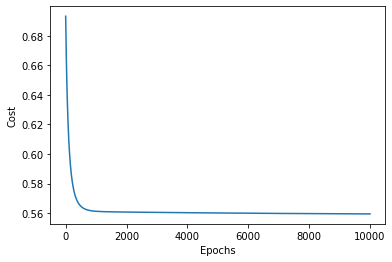

In [7]:
# create the logistic regression classifier
classifier = LogisticRegression(X_train, y_train, learning_rate=0.001, epochs=10000)

# train the classifier
classifier.fit()

# plot the loss
classifier.plot_loss()

In [8]:
# Test the classifier and report the accuracy
y_pred = classifier.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
accuracy = np.sum(y_pred == y_test) / len(y_pred)

print("Accuracy: ", accuracy)

Accuracy:  0.73288


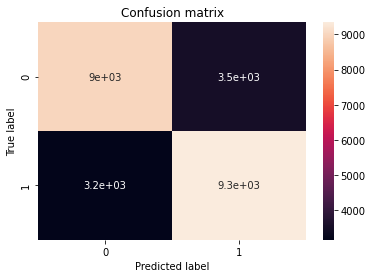

In [11]:
# function to create a confusion matrix
def create_confusion_matrix(y_true, y_pred):
    confusion_matrix = np.zeros((2, 2))
    for i in range(len(y_true)):
        confusion_matrix[int(y_true[i])][int(y_pred[i])] += 1
    return confusion_matrix

# create the confusion matrix
confusion_matrix = create_confusion_matrix(y_test, y_pred)

# plot the confusion matrix using seaborn
sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

### Part B: Use Scikit-learn

In this part, use scikit-learn’s [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) implementation to train and test the logistic regression on the provided dataset. Use scikit-learn’s accuracy_score function to calculate the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function to calculate confusion matrix on test set.

In [14]:
# use sklearn's logistic regression classifier
from sklearn.linear_model import LogisticRegression as LR

# create the logistic regression classifier
classifier = LR()

# train the classifier
classifier.fit(X_train, y_train)

/home/rafay/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Accuracy:  0.73048


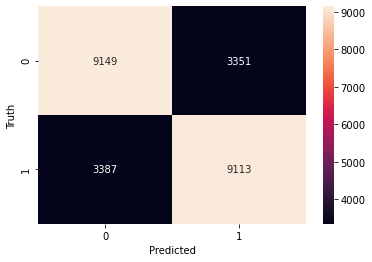

In [15]:
# use sklearn to calculate the accuracy, and confusion matrix and plot it
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# predict the labels for the test data
y_pred = classifier.predict(X_test)

# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()